In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df_games=pd.read_csv('..\Datasets_limpio\steam_games.csv', encoding='utf-8')
df_games.head()


,publisher,genres,app_name,title,price,early_access,id,developer,año_lanzamiento
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
1,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
2,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
3,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
4,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0


In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71550 entries, 0 to 71549
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   publisher        71503 non-null  object 
 1   genres           71550 non-null  object 
 2   app_name         71550 non-null  object 
 3   title            71550 non-null  object 
 4   price            71550 non-null  float64
 5   early_access     71550 non-null  bool   
 6   id               71550 non-null  int64  
 7   developer        71550 non-null  object 
 8   año_lanzamiento  70700 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 4.4+ MB


Como la columna Publisher y Developer son similares, eliminamos una columna, en este caso publisher ya que tiene mas nulos que developer y de igual forma app_name y title son iguales, po lo que eliminamos app_name

In [13]:
df_games=df_games.drop(['app_name', 'publisher'], axis=1)
#eliminamos fila que posee solo nulos
df_games = df_games.dropna()

df_games

,genres,title,price,early_access,id,developer,año_lanzamiento
0,Action,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
1,Casual,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
2,Indie,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
3,Simulation,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
4,Strategy,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
...,...,...,...,...,...,...,...
71545,Indie,Russian Roads,1.99,False,610660,Laush Dmitriy Sergeevich,2018.0
71546,Racing,Russian Roads,1.99,False,610660,Laush Dmitriy Sergeevich,2018.0
71547,Simulation,Russian Roads,1.99,False,610660,Laush Dmitriy Sergeevich,2018.0
71548,Casual,EXIT 2 - Directions,4.99,False,658870,"xropi,stev3ns",2017.0


Con el id puedo identificar la cantida de juegos que hay

In [14]:
total_juegos = len(df_games['id'].unique())
print(f"Total de juegos: {total_juegos}")

Total de juegos: 28546


Analizo la cantidad de juegos por genero

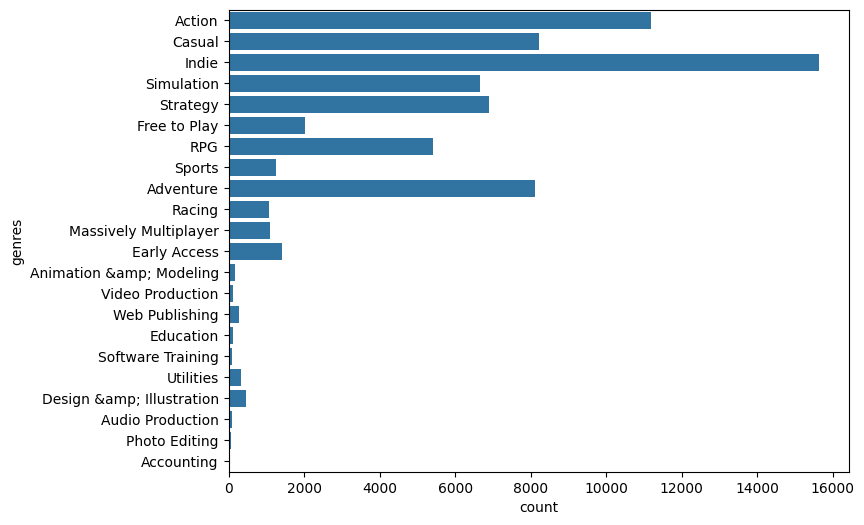

In [15]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df_games, y='genres', orient='h')
plt.show()

La mayoria de juegos son de 4 tipos, Action, Casual, indie y Adventure, siendo el caso de varios juegos que pueden tener mas de una categoria

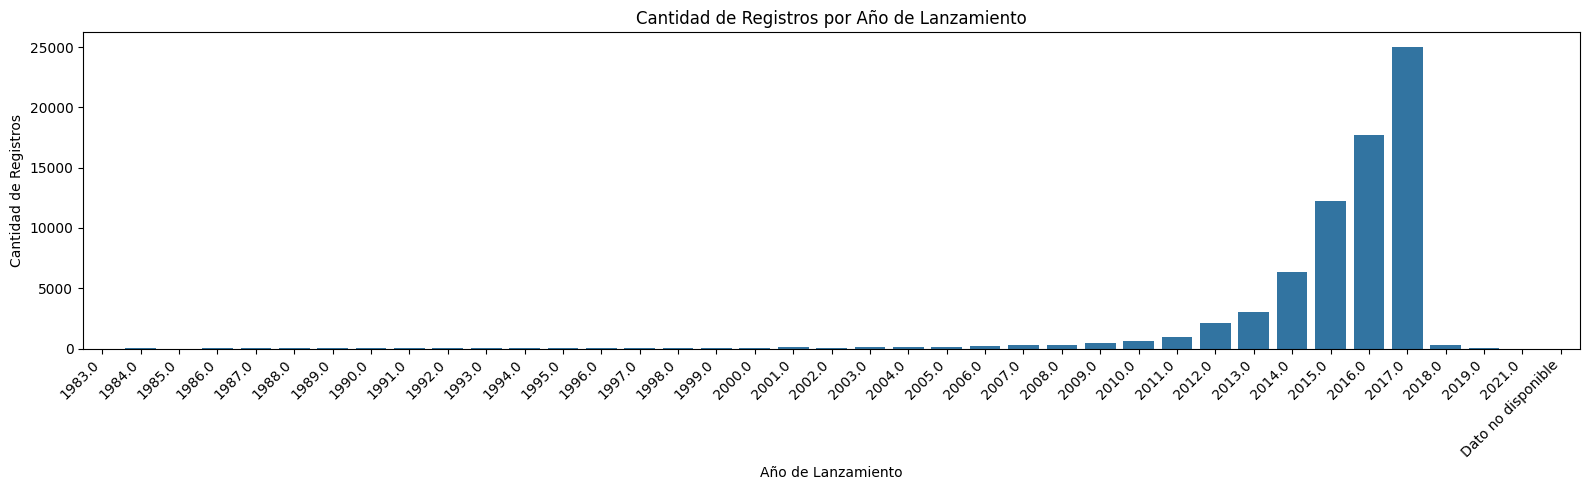

In [18]:
# Convierto a str la columna 'año_lazamiento'
df_games['año_lanzamiento'] = df_games['año_lanzamiento'].astype(str)

# Cuenta la frecuencia de cada año
conteo = df_games['año_lanzamiento'].value_counts()

# Ordena los valores para que 'Datos no disponibles' queden al principio o al final
conteo = conteo.reindex(['Dato no disponible'] + list(conteo.index))
conteo = conteo.sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(16, 5))
sns.barplot(x=conteo.index, y=conteo.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

La mayoria de lanzamientos de videojuegos se centran en 

Analizamos los datos de users_reviews

In [19]:
df_reviews = pd.read_csv('..\Datasets_limpio\df_reviews.csv', encoding='utf-8')
df_reviews.head()

,user_id,reviews_posted,reviews_item_id,reviews_helpful,reviews_recommend,sentiment_analysis,año_lanzamiento,developer,title
0,76561197970982479,"Posted November 5, 2011.",1250,No ratings yet,True,2,2009,Tripwire Interactive,Killing Floor
1,evcentric,Posted February 3.,248820,No ratings yet,True,2,2013,"Hopoo Games, LLC",Risk of Rain
2,doctr,"Posted October 14, 2013.",250320,2 of 2 people (100%) found this review helpful,True,2,2013,Telltale Games,The Wolf Among Us
3,maplemage,"Posted April 15, 2014.",211420,35 of 43 people (81%) found this review helpful,True,1,2012,FromSoftware,DARK SOULS™: Prepare To Die™ Edition
4,Wackky,"Posted May 5, 2014.",249130,7 of 8 people (88%) found this review helpful,True,1,2013,Traveller's Tales,LEGO® Marvel™ Super Heroes


In [20]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50218 entries, 0 to 50217
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             50218 non-null  object
 1   reviews_posted      50218 non-null  object
 2   reviews_item_id     50218 non-null  int64 
 3   reviews_helpful     50218 non-null  object
 4   reviews_recommend   50218 non-null  bool  
 5   sentiment_analysis  50218 non-null  int64 
 6   año_lanzamiento     50218 non-null  int64 
 7   developer           50218 non-null  object
 8   title               50218 non-null  object
dtypes: bool(1), int64(3), object(5)
memory usage: 3.1+ MB


In [21]:
# Agrupo por 'sentiment_analysis' y 'reviews_recommend'
df_grupo = df_reviews.groupby(['sentiment_analysis', 'reviews_recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_grupo.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_grupo.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis reviews_recommend                      
0                  False                  2332    4.643753
                   True                   5877   11.702975
1                  False                  1057    2.104823
                   True                   8810   17.543510
2                  False                  1955    3.893026
                   True                  30187   60.111912

Para los sentimientos comentarios Positivos se observa que hay un gran porcentaje de recomendaciones (60%) mientras que las recomendaciones para los sentimientos nulos y negativos representan aproximadamente el 30% quedando un 10% del total que no realizan ninguna recomendacion sea cual sea el sentimiento.

Analizaremos los datos de users_items

In [22]:
df_items = pd.read_csv(r'..\Datasets_limpio\user_items.csv', encoding='utf-8')
df_items.head()

,item_id,item_name,playtime_forever,steam_id,items_count,user_id
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479


In [23]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   steam_id          int64 
 4   items_count       int64 
 5   user_id           object
dtypes: int64(4), object(2)
memory usage: 233.2+ MB


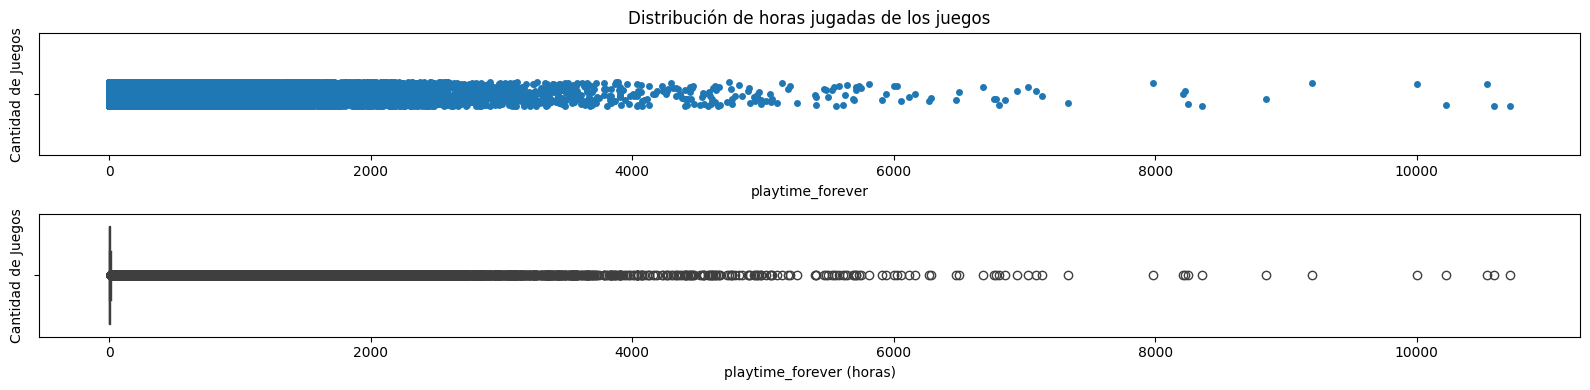

In [24]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de horas jugadas de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [25]:
estadisticas = df_items['playtime_hours'].describe()
print(f'El tiempo de juego medio (mediana) de los juegos es de: {round(estadisticas["50%"],2)}')
print(f'El tiempo de juego promedio (mean) de los juegos es de: {round(estadisticas["mean"],2)}')
print(f'El 75% de los juegos tienen un tiempo de juego menor de: {round(estadisticas["75%"],2)}')

El tiempo de juego medio (mediana) de los juegos es de: 0.57
El tiempo de juego promedio (mean) de los juegos es de: 16.51
El 75% de los juegos tienen un tiempo de juego menor de: 5.92


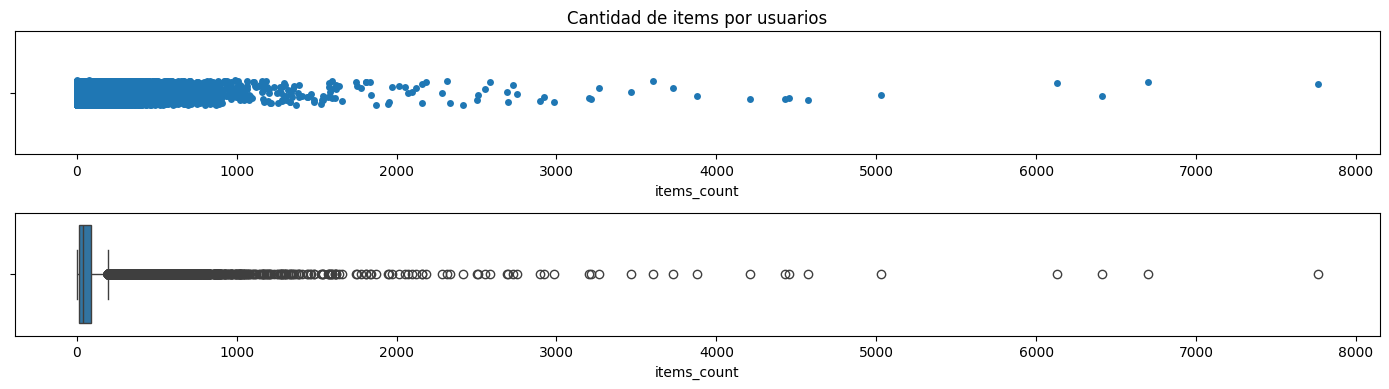

In [26]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count = df_items.groupby('user_id')['items_count'].unique().explode()
items_count = pd.DataFrame(items_count)
items_count_a = items_count.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_a, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_a, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [27]:
estadisticas = items_count['items_count'].astype(float).describe()
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas["50%"],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas["mean"],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas["75%"],2)}')

El precio medio (mediana) de los juegos es de: 40.0
El precio promedio (mean) de los juegos es de: 71.84
El 75% de los juegos tienen un precio menor de: 87.0


C:\Users\Manuel\AppData\Local\Temp\ipykernel_28524\325467037.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='playtime_forever', y='item_name', data=top_20, palette='viridis')


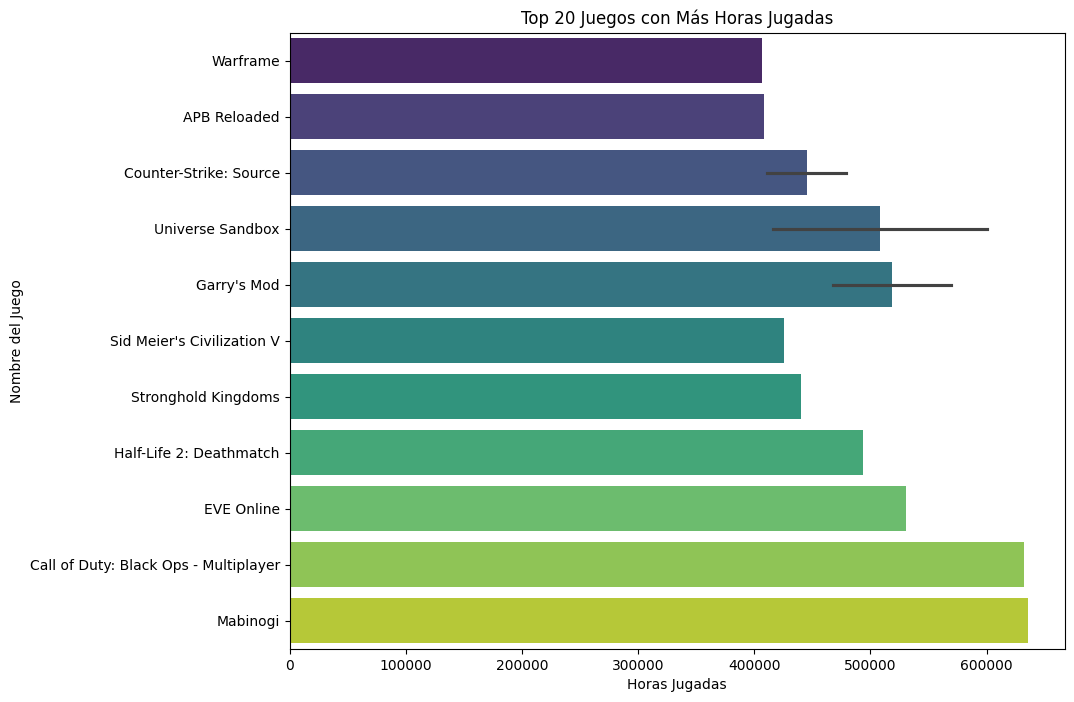

In [30]:

top_20 = df_items.nlargest(20, 'playtime_forever').sort_values(by='playtime_forever', ascending=True)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 8))
sns.barplot(x='playtime_forever', y='item_name', data=top_20, palette='viridis')
plt.xlabel('Horas Jugadas')
plt.ylabel('Nombre del Juego')
plt.title('Top 20 Juegos con Más Horas Jugadas')
plt.show()